Learning Multiple Layers of Features from Tiny Images, Alex Krizhevsky, 2009.

Data Preprocessing

Data loading and preprocessing (e.g., normalization, resizing, augmentation).
Create visualizations of some images, and labels.
Model Architecture

Design a CNN architecture suitable for image classification.
Include convolutional layers, pooling layers, and fully connected layers.
Model Training

Train the CNN model using appropriate optimization techniques (e.g., stochastic gradient descent, Adam).
Utilize techniques such as early stopping to prevent overfitting.
Model Evaluation

Evaluate the trained model on a separate validation set.
Compute and report metrics such as accuracy, precision, recall, and F1-score.
Visualize the confusion matrix to understand model performance across different classes.
Transfer Learning

Evaluate the accuracy of your model on a pre-trained models like ImagNet, VGG16, Inception... (pick one an justify your choice)
You may find this link helpful.
This is the Pytorch version.
Perform transfer learning with your chosen pre-trained models i.e., you will probably try a few and choose the best one.
Code Quality

Well-structured and commented code.
Proper documentation of functions and processes.
Efficient use of libraries and resources.
Report

Write a concise report detailing the approach taken, including:
Description of the chosen CNN architecture.
Explanation of preprocessing steps.
Details of the training process (e.g., learning rate, batch size, number of epochs).
Results and analysis of models performance.
What is your best model. Why?
Insights gained from the experimentation process.
Include visualizations and diagrams where necessary.
Model deployment

Pick the best model
Build an app using Flask - Can you host somewhere other than your laptop? +5 Bonus points if you use Tensorflow Serving
User should be able to upload one or multiples images get predictions including probabilities for each prediction

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


In [4]:
#borrowing heavily from Fares Sayah's model at https://www.kaggle.com/code/faressayah/cifar-10-images-classification-using-cnns-88

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical as tcat

from tensorflow.keras.models import Sequential as seq
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix


(xtrain, ytrain), (xtest, ytest) = cifar10.load_data()


print(f"xtrain shape: {xtrain.shape}")  # (50000, 32, 32, 3)
print(f"ytrain shape: {ytrain.shape}")  # (50000, 10)
print(f"xtest shape: {xtest.shape}")    # (10000, 32, 32, 3)
print(f"ytest shape: {ytest.shape}")    # (10000, 10)

xtrain shape: (50000, 32, 32, 3)
ytrain shape: (50000, 1)
xtest shape: (10000, 32, 32, 3)
ytest shape: (10000, 1)


In [5]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(xtrain) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow(xtrain[index,1:])
    label_index = int(ytrain[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)
#plt.show()

C:\Users\igriz\AppData\Local\Temp\ipykernel_27984\144115134.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_index = int(ytrain[index])


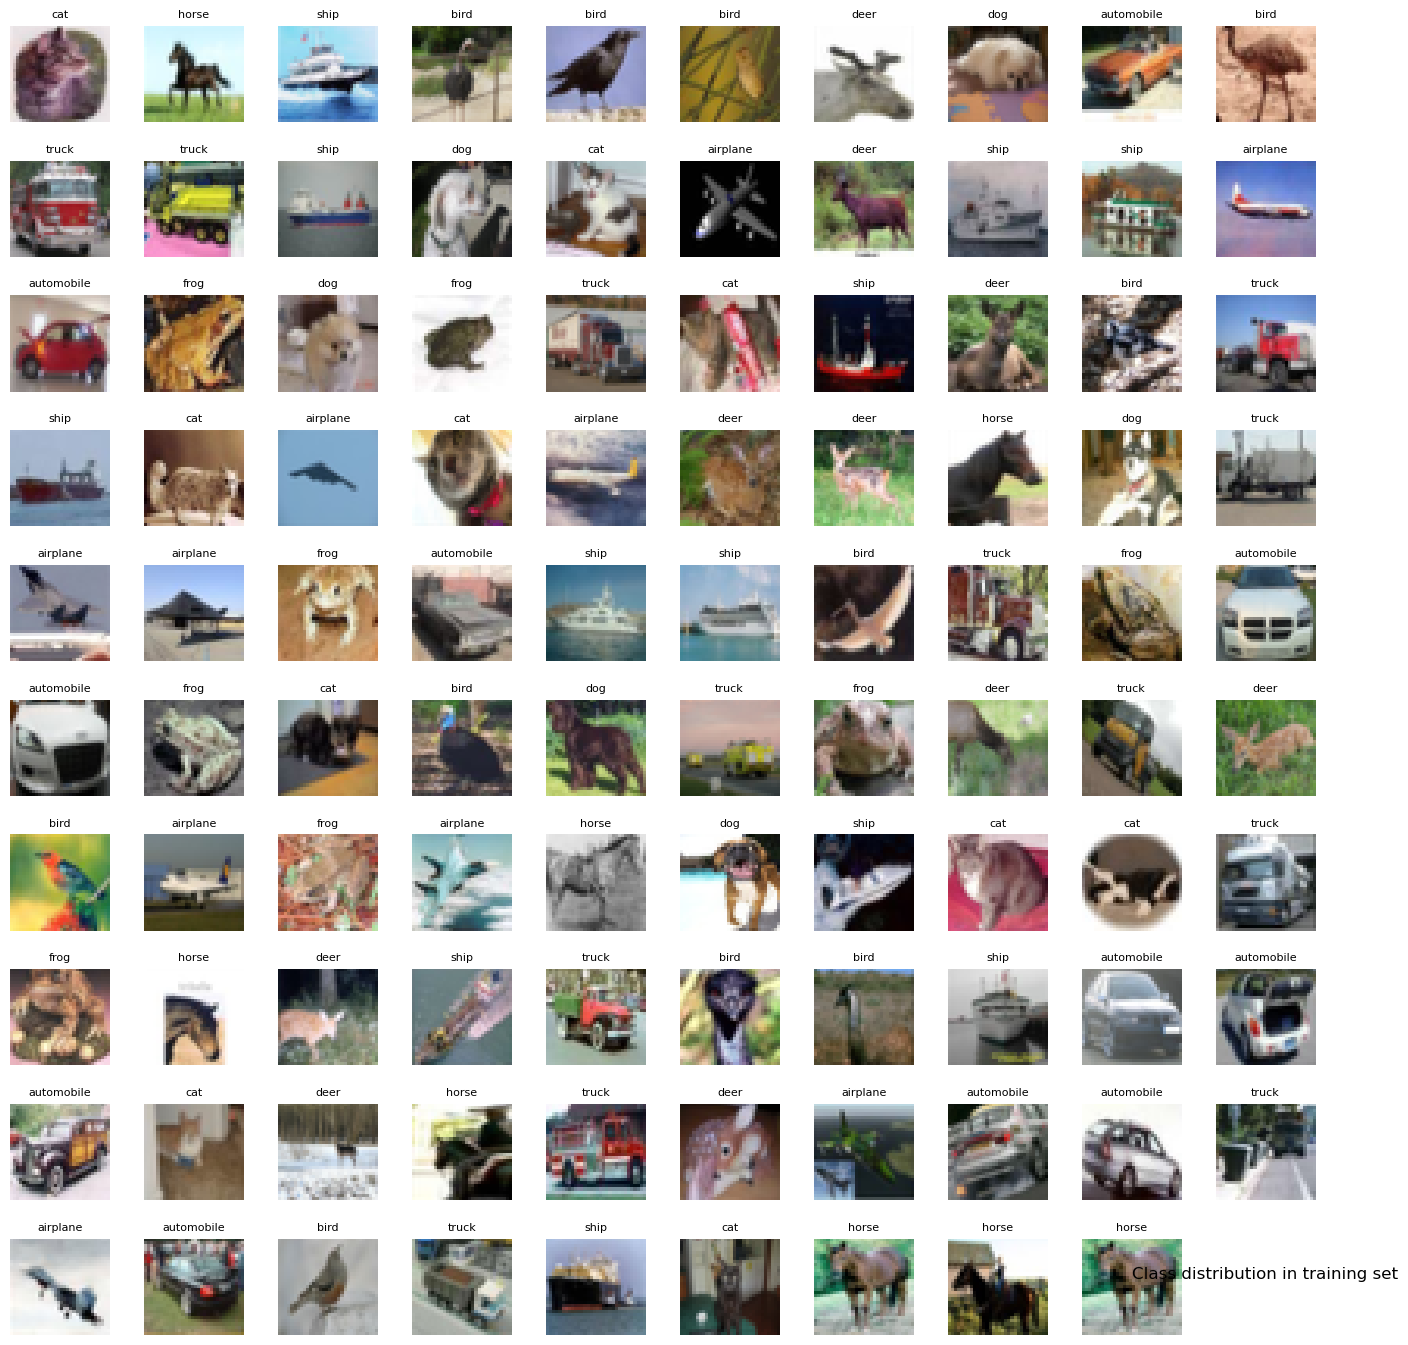

In [6]:
class_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

classes, counts = np.unique(ytrain, return_counts=True)
plt.barh(class_name, counts)
plt.title('Class distribution in training set')
plt.show()

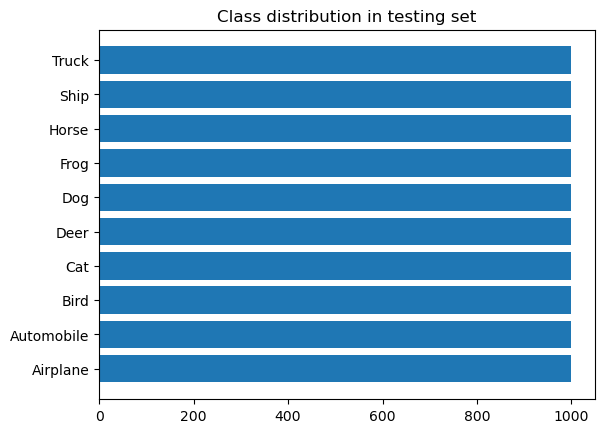

In [7]:
classes, counts = np.unique(ytest, return_counts=True)
plt.barh(class_name, counts)
plt.title('Class distribution in testing set')
plt.show()

In [8]:
# Check current shape of labels (before reshaping)
print(f"Before encoding: ytrain shape = {ytrain.shape}, ytest shape = {ytest.shape}")

# Apply one-hot encoding directly to scalar labels (ytrain and ytest)
ytrain = tcat(ytrain, 10)  # 10 represents the number of classes
ytest = tcat(ytest, 10)
# Scale the data
xtrain = xtrain / 255.0
xtest = xtest / 255.0

# Verify the new shape
print(f"After one-hot encoding: ytrain shape = {ytrain.shape}, ytest shape = {ytest.shape}")


Before encoding: ytrain shape = (50000, 1), ytest shape = (10000, 1)
After one-hot encoding: ytrain shape = (50000, 10), ytest shape = (10000, 10)


In [9]:
INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (4, 4)
model = seq()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

C:\Users\igriz\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,29

 Total params: 775,242 (2.96 MB)

 Trainable params: 774,346 (2.95 MB)

 Non-trainable params: 896 (3.50 KB)

In [11]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [12]:
from tensorflow.keras.optimizers import SGD
# Define the SGD optimizer
sgd_optimizer = SGD(learning_rate=0.05, momentum=0.5, nesterov=True)

model.compile(
    optimizer=sgd_optimizer,
    loss='categorical_crossentropy',  # Change the loss function if needed
    metrics=['accuracy']
)

batch_size = 124
data_generator = ImageDataGenerator(width_shift_range=0.15, height_shift_range=0.15, horizontal_flip=True)
train_generator = data_generator.flow(xtrain, ytrain, batch_size)
steps_per_epoch = xtrain.shape[0] // batch_size

In [13]:
r = model.fit(
    train_generator,
    epochs=20,
    steps_per_epoch=steps_per_epoch,
    validation_data=(xtest, ytest),
    callbacks=[early_stopping]
)

C:\Users\igriz\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
403/403 ━━━━━━━━━━━━━━━━━━━━ 143s 341ms/step - accuracy: 0.2675 - loss: 2.4114 - val_accuracy: 0.4484 - val_loss: 1.5586
Epoch 2/20
  1/403 ━━━━━━━━━━━━━━━━━━━━ 2:20 349ms/step - accuracy: 0.3387 - loss: 1.5629

C:\Users\igriz\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


403/403 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.3387 - loss: 1.5629 - val_accuracy: 0.4487 - val_loss: 1.5775
Epoch 3/20
403/403 ━━━━━━━━━━━━━━━━━━━━ 130s 322ms/step - accuracy: 0.4239 - loss: 1.5636 - val_accuracy: 0.5059 - val_loss: 1.3674
Epoch 4/20
403/403 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.5323 - loss: 1.3065 - val_accuracy: 0.5232 - val_loss: 1.3120
Epoch 5/20
403/403 ━━━━━━━━━━━━━━━━━━━━ 141s 349ms/step - accuracy: 0.4994 - loss: 1.3804 - val_accuracy: 0.4533 - val_loss: 1.5505
Epoch 6/20
403/403 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.5000 - loss: 1.4765 - val_accuracy: 0.5377 - val_loss: 1.3504
Epoch 7/20
403/403 ━━━━━━━━━━━━━━━━━━━━ 156s 388ms/step - accuracy: 0.5508 - loss: 1.2471 - val_accuracy: 0.5465 - val_loss: 1.2545
Epoch 8/20
403/403 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.6129 - loss: 1.1023 - val_accuracy: 0.4917 - val_loss: 1.4686
Epoch 9/20
403/403 ━━━━━━━━━━━━━━━━━━━━ 158s 393ms/step - accuracy: 0.6000 - loss: 1.1214 - val_acc

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = r.predict(xtest).argmax(axis=1)
y_true = ytest.argmax(axis=1)

# Metrics
print(classification_report(y_true, y_pred, target_names=class_name))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_name, yticklabels=class_name)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


AttributeError: 'History' object has no attribute 'predict'

In [ ]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

In [ ]:
evaluation = model.evaluate(xtest, ytest)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')
# convert one hot encoded ytest to class indices
ytest_classes = np.argmax(ytest, axis=1)


ypred = model.predict(xtest)
ypred = np.argmax(ypred, axis=1)
cm = confusion_matrix(ytest_classes, ypred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()